### Variability of classifier performance and cross-validation



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.datasets import make_classification
from sklearn.model_selection import (
    ShuffleSplit, LeaveOneOut, GridSearchCV,
    cross_val_predict,KFold,
    LeaveOneGroupOut, cross_val_score)
from sklearn.metrics import balanced_accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
import pandas as pd
import seaborn as sns



### The Table 1 fallacy in Machine Learning

It's very common to see tables in machine learning papers where the authors' model performance is in bold, showing that it outperforms the other models.  The simulation below shows just how unstable those results can be when different random seeds are used, even when the data stays the same.

Text(0.5, 9.444444444444438, 'difference (Perceptron - SGD)')

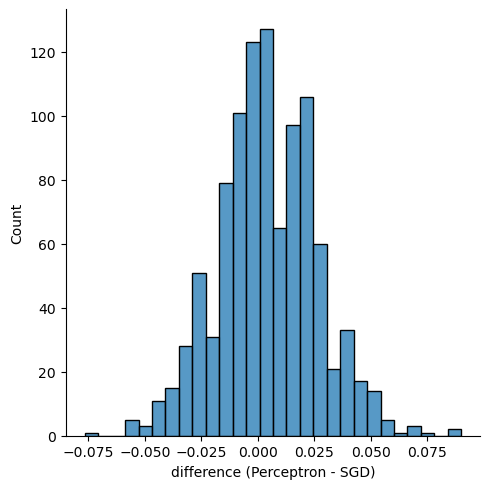

In [2]:
# generate a dataset
n_samples = 300 # 150 for CV, 150 for testing
n_features = 1000
n_classes = 2
top_p_features = .2
n_informative = 50
seed = 1

results = []
nruns = 1000
rng = np.random.RandomState(seed)

X, y = make_classification(n_samples=n_samples, n_features=n_features,
                            n_classes=n_classes, n_informative=n_informative,
                            random_state=rng)

# refit models with different random seeds
for run in range(nruns):
    seed = run + 1
    rng = np.random.RandomState(seed)
    np.random.seed(seed)

    # make a structured dataset with multiple samples per subject

    pipeline = Pipeline([
        ('clf', None),
    ])
    # run CV using several different classifiers on the dataset
    # with a fixed random seed
    parameters = [
        {
            'clf': [SGDClassifier(alpha=.01)],
        }, 
        {
            'clf': (Perceptron(),),
        },

    ]
    cv = KFold(n_splits=10, shuffle=True, random_state=rng)
    grid_search = GridSearchCV(pipeline, parameters, cv=cv,
                            scoring='accuracy', n_jobs=-3)
    grid_search.fit(X, y)
    results.append(grid_search.cv_results_['mean_test_score'])

results_df = pd.DataFrame(results, columns=['SGD', 'Perceptron'])
results_df['diff'] = results_df['Perceptron'] - results_df['SGD']

sns.displot(results_df['diff'])
plt.xlabel('difference (Perceptron - SGD)')



Text(0.5, 1.0, 'Perceptron vs SGD: same dataset, different random seeds')

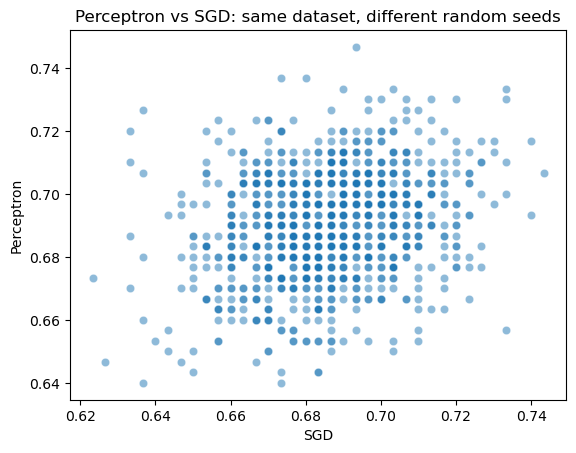

In [3]:
sns.scatterplot(data=results_df, 
                x = results_df.SGD,
                y = results_df.Perceptron,
                alpha=0.5)
plt.title('Perceptron vs SGD: same dataset, different random seeds')

SGD           0.636667
Perceptron    0.726667
diff          0.090000
Name: 787, dtype: float64


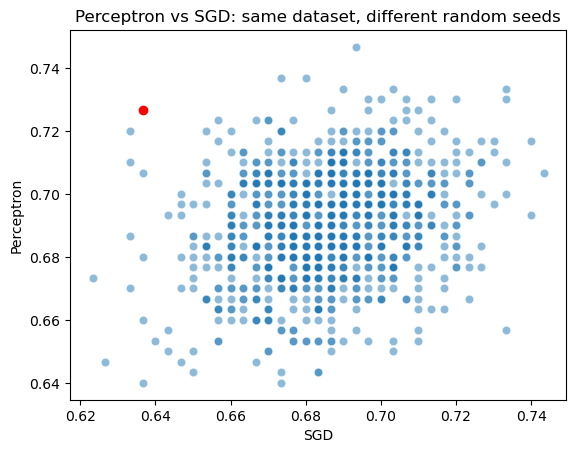

In [4]:
# highlight best perceptron diff
sns.scatterplot(data=results_df, 
                x = results_df.SGD,
                y = results_df.Perceptron,
                alpha=0.5)
sorted_df = results_df.sort_values('diff', ascending=False)
plt.scatter(sorted_df.SGD.iloc[0], sorted_df.Perceptron.iloc[0], c='red')
plt.title('Perceptron vs SGD: same dataset, different random seeds')
print(sorted_df.iloc[0,:])

SGD           0.733333
Perceptron    0.656667
diff         -0.076667
Name: 234, dtype: float64


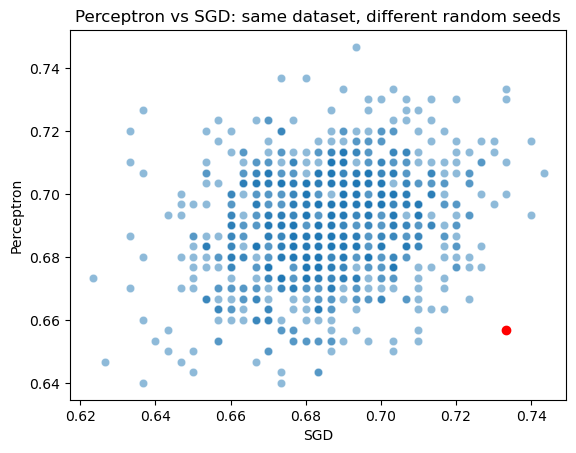

In [5]:
# highlight best sgd diff
sns.scatterplot(data=results_df, 
                x = results_df.SGD,
                y = results_df.Perceptron,
                alpha=0.5)
sorted_df = results_df.sort_values('diff', ascending=True)
plt.scatter(sorted_df.SGD.iloc[0], sorted_df.Perceptron.iloc[0], c='red')
plt.title('Perceptron vs SGD: same dataset, different random seeds')
print(sorted_df.iloc[0,:])

In [6]:
results_df.mean(axis=0)

SGD           0.685633
Perceptron    0.690090
diff          0.004457
dtype: float64